In [1]:
%matplotlib inline

In [2]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
from mayavi import mlab

## QA highres to lowres mapping

In [3]:
# load the meshes
complex_v,complex_f, complex_d = read_vtk('/scr/ilz3/myelinconnect/struct/surf_lh/orig/mid_surface/BP4T_lh_mid.vtk')

In [4]:
simple_v, simple_f, simple_d = read_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/lowres_lh_d_def.vtk')

In [5]:
labelling=np.loadtxt('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/labelling_lh.txt')

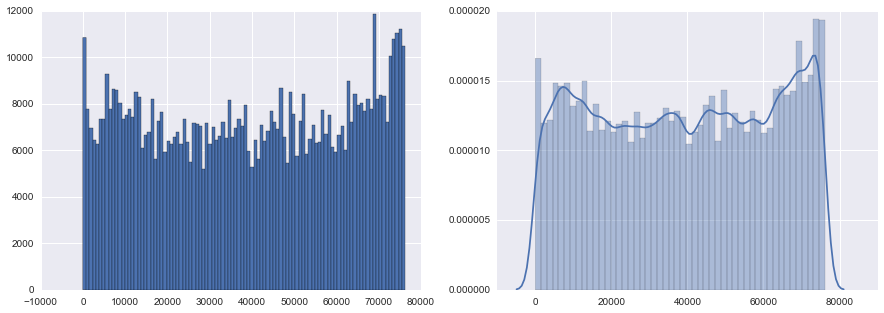

In [6]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.hist(labelling[:,1], bins=100)
fig.add_subplot(122)
sns.distplot(labelling[:,1], )

In [7]:
# count how many of each label
label_count=np.empty((int(labelling[:,1].max()),))
for i in range(int(labelling[:,1].max())):
   label_count[i] = len(np.where(labelling[:,1] ==i)[0])        

In [8]:
print 'min : '+str(np.min(label_count))
print 'max : '+str(np.max(label_count))
print 'mean : '+str(np.mean(label_count))
print 'sdv : '+str(np.std(label_count))

min : 0.0
max : 1485.0
mean : 9.67505381425
sdv : 25.4897970078


In [9]:
print 'labels with no vertices : '+str(len(np.where(label_count==np.min(label_count))[0]))

labels with no vertices : 10514


### Plot largest cluster

In [10]:
cmap=np.zeros((3,4))
cmap[0,:]=[0.9, 0.9, 0.9, 1]
#cmap[1,:]=[0.86, 0.37119999999999997, 0.34,1]
cmap[1,:]=[0.20125317221201128, 0.6907920815379025, 0.6,1]
#cmap[2,:]=[0.20125317221201128, 0.6907920815379025, 0.6,1]
cmap[2,:]=[0.21044753832183283, 0.55, 0.7,1]
for row in range(cmap.shape[0]):
    cmap[row]=[np.floor(i * 255) for i in cmap[row]]
cmap=cmap.astype(int)

In [11]:
max_label = np.where(label_count==np.max(label_count))[0][0]
masked_labelling = np.zeros_like(labelling[:,1])
masked_labelling[labelling[:,1]==max_label] = 1

In [14]:
write_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/max_label.vtk', complex_v, complex_f, 
          data=masked_labelling[:,np.newaxis])

/home/raid3/huntenburg/workspace/brainsurfacescripts/vtk_rw.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data!=None:


In [ ]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(complex_v[:,0],complex_v[:,1],complex_v[:,2],complex_f,
                           scalars=masked_labelling, colormap='gist_gray')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
img.module_manager.scalar_lut_manager.lut.table = cmap
mlab.view(300,495, 300, np.array([120,100,90]))
mlab.draw()
mlab.show()

### Plot every 100s cluster

In [15]:
spaced_labels = np.floor(np.linspace(0,len(label_count), len(label_count)/100))
spaced_labelling = np.zeros_like(labelling[:,1])

count = 1
for l in spaced_labels:
    spaced_labelling[labelling[:,1]==l] = count
    count+=1

In [16]:
write_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/spaced_label.vtk', complex_v, complex_f, 
          data=spaced_labelling[:,np.newaxis])

In [ ]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(complex_v[:,0],complex_v[:,1],complex_v[:,2],complex_f,
                           scalars=spaced_labelling, colormap='prism')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
#img.module_manager.scalar_lut_manager.lut.table = new_cmap
#mlab.view(300,495, 300, np.array([120,100,90]))
mlab.draw()
mlab.show()

### Plot some clustered labels 

In [34]:
clustered_labels = np.arange(50000, 50050)
clustered_labelling = np.zeros_like(labelling[:,1])
count = 1
for c in clustered_labels:
    clustered_labelling[labelling[:,1]==c] = count
    count+=1

In [36]:
write_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/clustered_label.vtk', complex_v, complex_f, 
          data=clustered_labelling[:,np.newaxis])

In [35]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(complex_v[:,0],complex_v[:,1],complex_v[:,2],complex_f,
                           scalars=clustered_labelling, colormap='prism')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
#img.module_manager.scalar_lut_manager.lut.table = new_cmap
#mlab.view(300,495, 300, np.array([120,100,90]))
mlab.draw()
mlab.show()

In [ ]:
def rand_cmap(nlabels, type='bright', first_color_black=False, first_color_white=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np



    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in xrange(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]
            
        if first_color_white:
            randRGBcolors[0] = [1, 1, 1]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]
            
        if first_color_white:
            randRGBcolors[0] = [1, 1, 1]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [ ]:
# dispay all on surface
masked_labelling = np.zeros_like(labelling[:,1])
masked_labelling[labelling[:,1]==0] = 1
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(complex_v[:,0],complex_v[:,1],complex_v[:,2],complex_f,scalars=masked_labelling, colormap='gist_gray')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
img.module_manager.scalar_lut_manager.lut.table = cmap
mlab.view(300,495, 300, np.array([120,100,90]))
mlab.draw()
for i in range(int(labelling[:,1].max())):
    print i
    masked_labelling = np.zeros_like(labelling[:,1])
    masked_labelling[labelling[:,1]==i] = 1
    img.mlab_source.scalars = masked_labelling
mlab.show()